In [14]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
# Check if there are any missing values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-18-c4fee3ee14b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


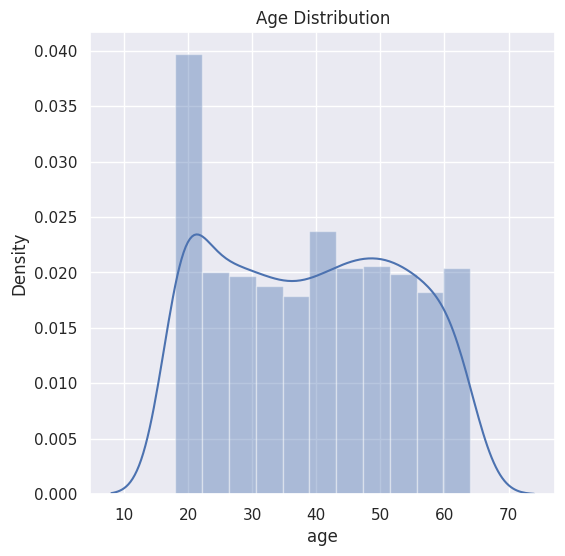

In [18]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

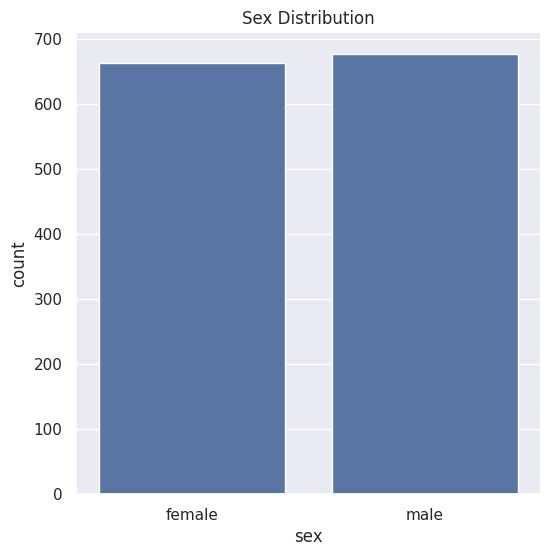

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title("Sex Distribution")
plt.show()

<ipython-input-21-e57fc065843c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


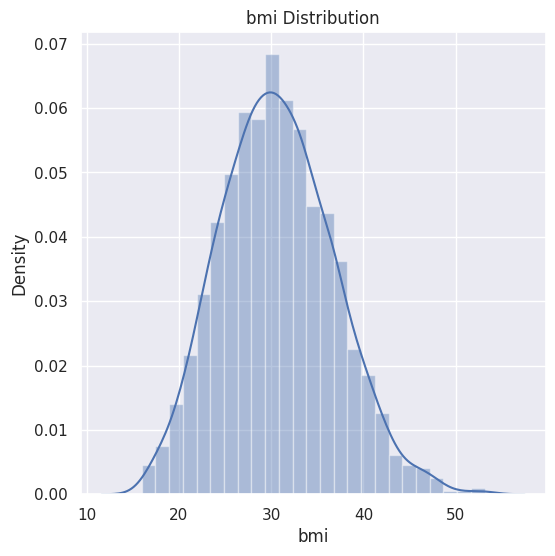

In [21]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title("bmi Distribution")
plt.show()

Normal Bmi range -> 18.5 to 24.9

In [24]:
df['bmi'].value_counts()

,count
bmi,
32.300,13
28.310,9
30.495,8
30.875,8
31.350,8
...,...
46.200,1
23.800,1
44.770,1


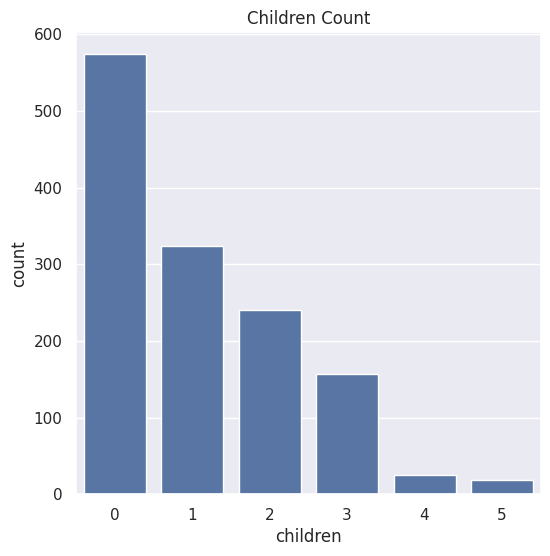

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x="children", data=df)
plt.title("Children Count")
plt.show()

In [27]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


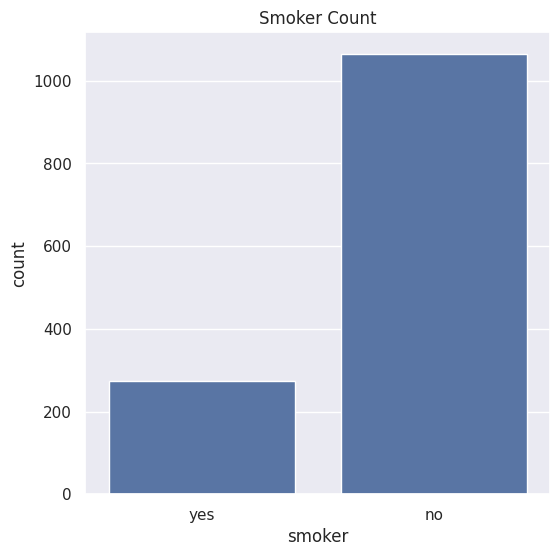

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x="smoker", data=df)
plt.title("Smoker Count")
plt.show()

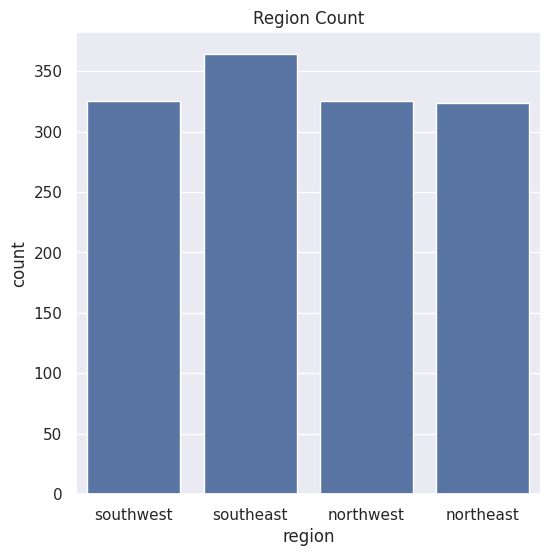

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x="region", data=df)
plt.title("Region Count")
plt.show()

<ipython-input-32-ecc15df727ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


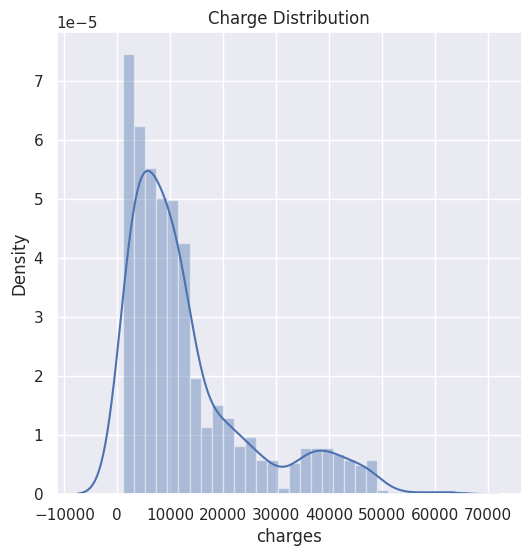

In [32]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("Charge Distribution")
plt.show()

Encode the Catagorical Features
1. Sex
2. Smoker
3. Region

male ---> 0
, female ---> 1

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df.sex)

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [35]:
df['sex'].value_counts()

,count
sex,
1,676
0,662


Encode

*   smoker
*   region



In [37]:
df['smoker']  = label_encoder.fit_transform(df.smoker)
df['region'] = label_encoder.fit_transform(df.region)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Split the data into features and target

In [38]:
X = df.drop(columns="charges", axis=1)
Y = df['charges']


In [42]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [43]:
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


Split the data into training and testing data

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=2)

In [45]:
X.shape

(1338, 6)

In [46]:
X_train.shape

(1070, 6)

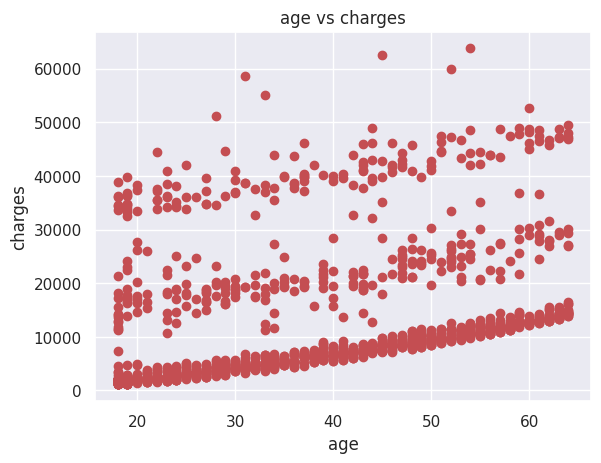

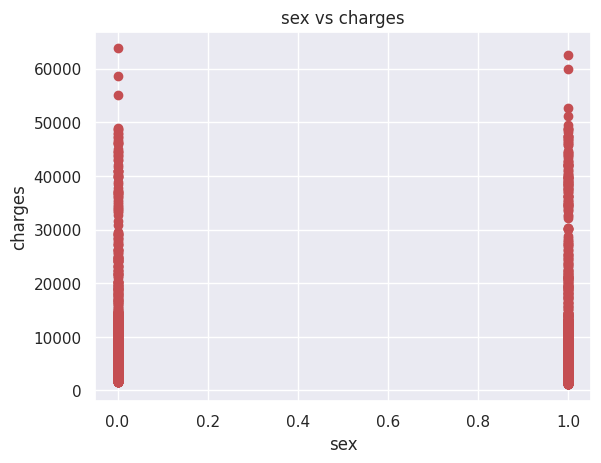

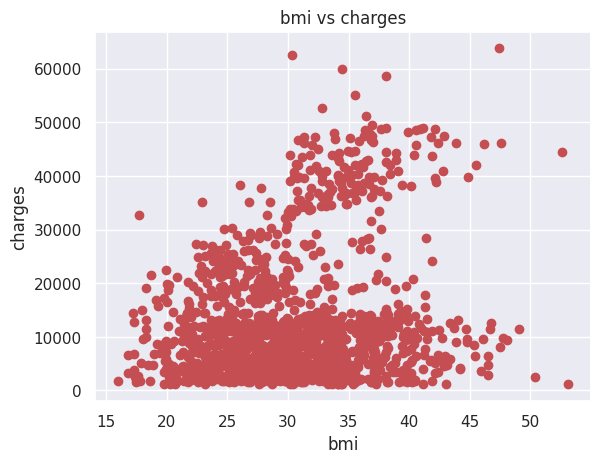

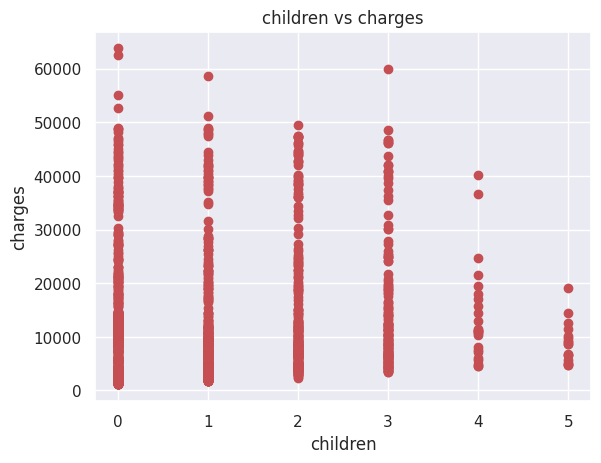

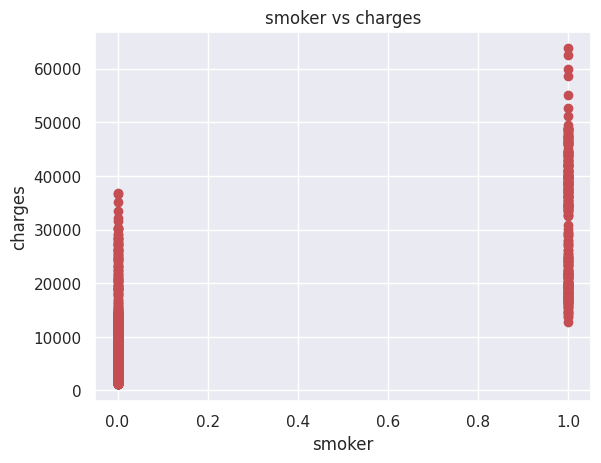

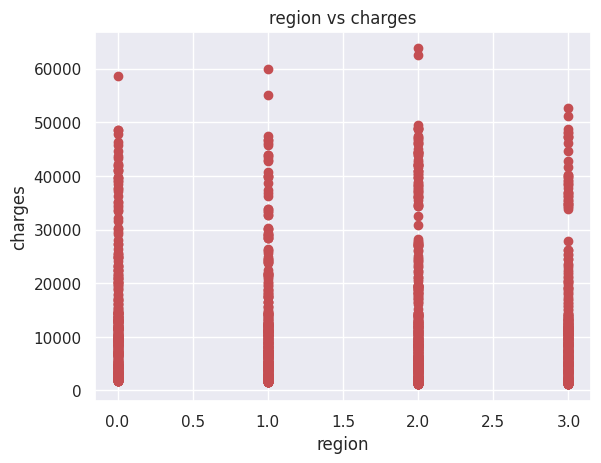

In [53]:
for i in range(0, X.shape[1]):
  plt.scatter(X[X.columns[i]], Y, c='r')
  plt.title(X.columns[i] + " vs charges")
  plt.xlabel(X.columns[i])
  plt.ylabel("charges")
  plt.show()


In [58]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [62]:
print("Co-efficient: ", regr.coef_)
print("Intercept:", regr.intercept_)

Co-efficient:  [  251.36689613   -35.4338166    330.76133485   589.05862101
 23905.96516848  -323.62760276]
Intercept: -11747.4671720888


In [64]:
Y_hat = regr.predict(X_train)

Model Evaluation

In [71]:
from sklearn.metrics import r2_score, mean_squared_error
# R squared value
r2_train = r2_score(Y_train, Y_hat)

print("R squared value:", r2_train)

R squared value: 0.7519923667088932


In [68]:
Y_hat_test = regr.predict(X_test)

In [69]:
r2_test = r2_score(Y_test, Y_hat_test)

print("R squared value:", r2_test)

R squared value: 0.7445422986536503


In [72]:
print("Mean Squared error:", mean_squared_error(Y_hat_test, Y_test))

Mean Squared error: 38364832.19054552


Building a Predictive System

In [79]:
# 60,female,36.005,0,no,northeast  13228.84695

input_data = (60,0,36.005,0,0,0)

input_data = np.asarray(input_data).reshape(1, -1)

prediction = regr.predict(input_data)

print(prediction)

[15243.60845691]
